In [5]:
import os 
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import matplotlib as mpl
from cycler import cycler
from matplotlib.ticker import MultipleLocator
from scipy.signal import windows
from scipy.optimize import minimize, curve_fit
from scipy.fftpack import rfft, irfft, rfftfreq, fft, fftfreq, ifft

c_cycle = np.array(['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00'])
mpl.rcParams.update({'font.size': 18, 'axes.labelpad': -2, 'axes.linewidth': 1.2, 'axes.titlepad': 8.0,
                    'legend.framealpha': 0.4, 'legend.borderaxespad': 0.3, 'legend.borderpad': 0.2,
                    'legend.labelspacing': 0, 'legend.handletextpad': 0.2, 'legend.handlelength': 1.0,
                    'legend.loc': 'best', 'xtick.labelsize': 'small', 'xtick.major.pad': 2, 
                    'xtick.major.size': 3, 'xtick.major.width': 1.2, 'ytick.labelsize': 'small',
                    'ytick.major.pad': 2, 'ytick.major.size': 3, 'ytick.major.width': 1.2,
                     'axes.prop_cycle': cycler(color=c_cycle)})
c_rho, c2_rho, c_v, c2_v = [0,0,0], [50,200,100], [30,30,250], [190,200,110]
c_fint, c2_fint, c_fext, c2_fext = [0,120,10], [255,200,100], [190,0,0], [220,200,60]
c_fsup, c2_fsup, c_fvis, c2_fvis, c_fstr, c2_fstr  = ([110,0,190], [170,170,170], [0,150,150], 
                                                      [240,170,230], [100,90,70], [200,210,50])

In [4]:
# zeilen = 2
# spalten = 5
# faktor = 4
# figsize = (spalten*faktor, zeilen*faktor)
# fig = plt.figure(figsize=figsize)
# fig.subplots_adjust(left=0.07, bottom=0.1, right=0.97, top=0.92, wspace=0.35, hspace=0.35)
# ax1 = fig.add_subplot(zeilen, spalten, 1)
# ind = 0
# for z in range(zeilen):
#     for s in range(spalten):
#         ind +=1
#         if ind != 1:
#             vars()["ax"+str(ind)] = fig.add_subplot(zeilen, spalten, ind, sharex=ax1)

# titles = np.array([ ["density", "velocity", "velocity", "velocity", ""], 
#                   ["internal", "external", "superadiabatic", "viscous", "structural"] ])

# y_labels = np.array([ [ r"$\rho\sigma^{3}$", r"$v^{(x)}\tau/\sigma$", r"$v^{(y)}\tau/\sigma$",
#                      r"$v^{(z)}\tau/\sigma$", ""],
#                      [r"$f^{\,(z)}_{\mathrm{int}}\sigma/\epsilon$", r"$f^{\,(z)}_{\mathrm{ext}}\sigma/\epsilon$", 
#                       r"$f^{\,(z)}_{\mathrm{sup}}\sigma/\epsilon$", r"$f^{\,(z)}_{\mathrm{visc}}\sigma/\epsilon$", 
#                       r"$f^{\,(z)}_{\mathrm{struc}}\sigma/\epsilon$"] ])
# ##########################         rho0 - rho1 - Jz   ############################
# # d, a = 1, 1
# # relp = "/home/toni/workspace/BAExchange/Projekt-Code/WorkEnv/Extensions/Vector/ProfileCheck/Results/NEW-rho0-rho1-Jz/"
# # rho_0_sim = [0.4, 0.6, 0.8]
# # rho_1_sim = [0.05, 0.1, 0.3, 0.5]
# # Jz_sim = [0.5,2,5,7,9]
# # r0 = 0.6
# # r1 = 0.3
# # for col, j in enumerate(Jz_sim):
# #     add = "NEW-rho0-"+str(r0)+"-rho1-"+str(r1)+"-Jz-"+str(j)
# #     data_path = relp + add + "/" + add + "_FullData.txt"
# #     data = np.loadtxt(data_path, skiprows=1, unpack=True)
# ##########################         rho=const.  - vz   ############################
# d,a = 1,1
# relp = "/home/toni/workspace/BAExchange/Projekt-Code/WorkEnv/Extensions/Vector/ProfileCheck/Results/SaturationJ/"
# name_liste = ["0.1Cos(1)+0.7", "0.01Cos(5)+0.4", "0.3Saw(2,0.5)+0.6", "0.3Sin(3)+0.5", "New-Bulk"]
# name = name_liste[4]
# J_list = [0,2,4,6,8,10,12,14,16,18,20,30,40,50]
# J_plot = [0,2,4,6,8,10]
# for col, j in enumerate(J_plot):
#     part = "/" + "Sat-" + name + "-J-" + str(j)
#     data_path = relp + name + part + part +"_FullData.txt"
#     data = np.loadtxt(data_path, skiprows=1, unpack=True)
# ######################################################################################################                   
#     profiles_sel = np.array([ [data[0,:], data[2,:], data[4,:], data[6,:], data[0,:]],
#                         [data[12,:], data[18,:], data[30,:], data[36,:], data[42,:]] ])

#     profiles = np.array([ [data[0+1,:], data[2+1,:], data[4+1,:], data[6+1,:], data[0+1,:]],
#                         [data[12+1,:], data[18+1,:], data[30+1,:], data[36+1,:], data[42+1,:]] ])

#     ax1.set_xticks(ticks=[j for j in np.linspace(0, output_bins, 6)], labels=[int(i) for i in np.linspace(0, 10, 6)])
#     ax1.set_xlim(0, output_bins)
#     ax_k = 1
#     for z in range(titles.shape[0]):
#         for s in range(titles.shape[1]):
#             if ((z==0) and (s==4)): 
#                 vars()["ax"+str(ax_k)].axis("off")
#             else:
#                 vars()["ax"+str(ax_k)].ticklabel_format(useOffset=True, useMathText=True, scilimits=(-2,3), style='sci', axis='y')
#                 vars()["ax"+str(ax_k)].yaxis.offsetText.set_fontsize(16)
#                 vars()["ax"+str(ax_k)].set_xlabel(r"$z/\sigma$")
#                 vars()["ax"+str(ax_k)].set_ylabel(y_labels[z,s])
#                 vars()["ax"+str(ax_k)].set_title(titles[z,s])
#                 vars()["ax"+str(ax_k)].plot(x, profiles_sel[z,s], c=c_cycle[col], linewidth=1.5, zorder=10)
#                 vars()["ax"+str(ax_k)].plot(x, profiles[z,s], c=c_cycle[col], linewidth=1.2, alpha=0.5)
#             ax_k += 1

#     labels = [r"A={:.0f}".format(a), r"$J_{z}\,\sigma^{2}\tau = $"+"{:.0f}".format(j)]
#     vars()["ax"+str(5)].plot([], [], c=c_cycle[col], label=labels[d])
# vars()["ax"+str(5)].plot([], [], c="k", lw=2, label="model")
# vars()["ax"+str(5)].plot([], [], c="k", lw=1, alpha=0.5, label="simulation")
# vars()["ax"+str(5)].legend(fontsize=20, loc="upper left", framealpha=0.5, facecolor="wheat")
# ax2.set_ylim(-1, 1)
# ax3.set_ylim(-1, 1)

# def ylab(label, axis):
#     locs = axis.get_yticks()
#     llocs = '%.3e' % locs[-1]
#     yoff = int(str(llocs).split('e')[1])
#     axis.yaxis.get_offset_text().set_visible(False)
#     sci = r' $\cdot 10^{%i}$' % yoff
#     if yoff < -1:
#         return label + sci
#     else: 
#         return label
# ind = 1
# for z in range(zeilen):
#     for s in range(spalten):
#         vars()["ax"+str(ind)].set_ylabel(ylab(y_labels[z,s], vars()["ax"+str(ind)]))
#         ind += 1

#plt.savefig("/home/toni/workspace/BAExchange/Thesis/MA/Bilder/Design-Vz-N600.pdf")

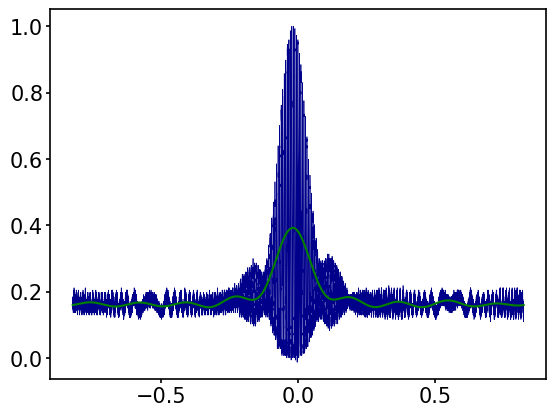

In [20]:
data = np.load("C:/Users/toni-/OneDrive/Alt/Desktop/Uni/Master/PPD/Versuche/UltraKurzZeitPhysik/Daten/auto.npy")
x = data[:,0]
AKF = data[:,1]/np.max(data[:,1])
filtered = data[:,2]/np.max(data[:,1])
data2 = np.load("C:/Users/toni-/OneDrive/Alt/Desktop/Uni/Master/PPD/Versuche/UltraKurzZeitPhysik/Daten/FT_auto.npy")
f = data2[:,0]
FT = data2[:,1]

plt.plot(x, AKF, c="darkblue", linewidth=0.5)
plt.plot(x, filtered, c="green") 

# spalten = 2
# zeilen = 1
# faktor = 4.5
# figsize = (spalten*faktor, zeilen*faktor)
# fig = plt.figure(figsize=figsize)
# ax1 = fig.add_subplot(zeilen, spalten, 1)
# ax2 = fig.add_subplot(zeilen, spalten, 2)

# ax1.plot(x, AKF, c="darkblue", linewidth=0.5)
# ax1.plot(x, filtered, c="darkgreen", linewidth=1.5)



